<a href="https://colab.research.google.com/github/gauravsmind/Stock-Price-Predictor/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bring in the data from yahoo.
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

start = dt.datetime(2017, 9, 1)
end = dt.datetime(2019, 8, 31)

data = web.DataReader("RELIANCE.NS", 'yahoo', start, end)

data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,1294.000000,1259.000000,1294.000000,1266.800049,8778739.0,1266.800049
2019-08-27,1285.000000,1261.199951,1285.000000,1274.849976,12984396.0,1274.849976
2019-08-28,1281.000000,1256.050049,1273.750000,1263.300049,5305639.0,1263.300049
2019-08-29,1260.250000,1235.300049,1256.449951,1241.750000,8635974.0,1241.750000
2019-08-30,1254.400024,1221.000000,1245.500000,1248.550049,11308120.0,1248.550049


In [2]:
#Lets Get ML Models now

import math
from math import ceil 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Seperate 2 % of the data to forecast. 
#print(len(data))
forecast_out = int(math.ceil(.01 * len(data))) # Returns smallest int not less than 

# Math.ceil() rounds it up if it's a positive float value
forecast_out

5

In [3]:
#PREPROCESSING AND DATA VALIDATION
#Drop missing value
data.fillna(value=-99999, inplace = True)
data.dropna(inplace=True)

import numpy as np

# shift the adj close rows negative so going back 6 day on the adj close
# because of the value of forecast_out
forecast_col = 'Adj Close'
data['label'] = data[forecast_col].shift(-forecast_out)
Y = np.array(data)
X = np.array(data.drop(['label'], 1)) # drop the nan values from the array.

print(X)

[[8.08299988e+02 7.99500000e+02 7.99924988e+02 8.05049988e+02
  7.05495400e+06 7.95709351e+02]
 [8.18075012e+02 7.97924988e+02 8.07750000e+02 8.06674988e+02
  9.85675000e+06 7.97315491e+02]
 [8.17424988e+02 8.10525024e+02 8.15000000e+02 8.16299988e+02
  1.15282620e+07 8.06828857e+02]
 ...
 [1.28100000e+03 1.25605005e+03 1.27375000e+03 1.26330005e+03
  5.30563900e+06 1.26330005e+03]
 [1.26025000e+03 1.23530005e+03 1.25644995e+03 1.24175000e+03
  8.63597400e+06 1.24175000e+03]
 [1.25440002e+03 1.22100000e+03 1.24550000e+03 1.24855005e+03
  1.13081200e+07 1.24855005e+03]]


In [4]:
# Scale to standardize the data since it is so sparse. 
X = preprocessing.scale(X)

print(X)

# Create the Feature X and early X for model generation and eval Test.
X_lately = X[-forecast_out:]    # the most recent arrrays
X = X[:forecast_out]

print(X_lately)
print(len(X_lately))

print(X)
print(len(X))

[[-1.73321751 -1.6891877  -1.73178327 -1.70528285 -0.26263387 -1.69605452]
 [-1.6758967  -1.69868891 -1.68542575 -1.69560592  0.39332989 -1.68658367]
 [-1.67970845 -1.62267963 -1.64247475 -1.63828868  0.78466863 -1.63048664]
 ...
 [ 1.03869854  1.06493454  1.07528625  1.02361344 -0.67218805  1.06116584]
 [ 0.9170204   0.93976089  0.97279601  0.89528209  0.10751864  0.93409266]
 [ 0.8827161   0.85349634  0.90792549  0.93577664  0.73312841  0.9741902 ]]
[[ 1.11493062  1.08273002  1.19525281  1.04445607  0.14094315  1.08180412]
 [ 1.06215456  1.09600114  1.14193434  1.09239369  1.12558251  1.12927175]
 [ 1.03869854  1.06493454  1.07528625  1.02361344 -0.67218805  1.06116584]
 [ 0.9170204   0.93976089  0.97279601  0.89528209  0.10751864  0.93409266]
 [ 0.8827161   0.85349634  0.90792549  0.93577664  0.73312841  0.9741902 ]]
5
[[-1.73321751 -1.6891877  -1.73178327 -1.70528285 -0.26263387 -1.69605452]
 [-1.6758967  -1.69868891 -1.68542575 -1.69560592  0.39332989 -1.68658367]
 [-1.67970845 -1

In [5]:
# Create the Label - Train. 
y = np.array(data['label'])
y = y[:forecast_out]

print(len(y))
print(y)

5
[807.42193604 808.41027832 814.19238281 839.14941406 834.05914307]


In [6]:
#  80/20 split = Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=72)

print(len(X_train))
print(len(y_train))
print(X_train)
print(y_train)

4
4
[[-1.59130848 -1.59568449 -1.59508056 -1.62756969 -0.17985234 -1.61999618]
 [-1.67970845 -1.62267963 -1.64247475 -1.63828868  0.78466863 -1.63048664]
 [-1.62795852 -1.61740122 -1.65313838 -1.6001763   3.30306973 -1.59318592]
 [-1.73321751 -1.6891877  -1.73178327 -1.70528285 -0.26263387 -1.69605452]]
[834.05914307 814.19238281 839.14941406 807.42193604]


In [7]:
clfreg = LinearRegression(n_jobs=-1) # use all CPU 
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

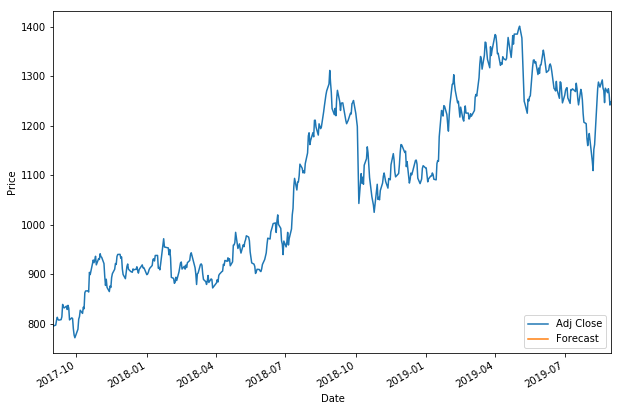

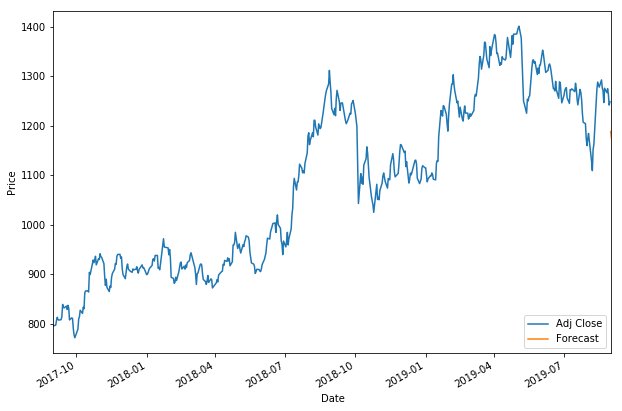

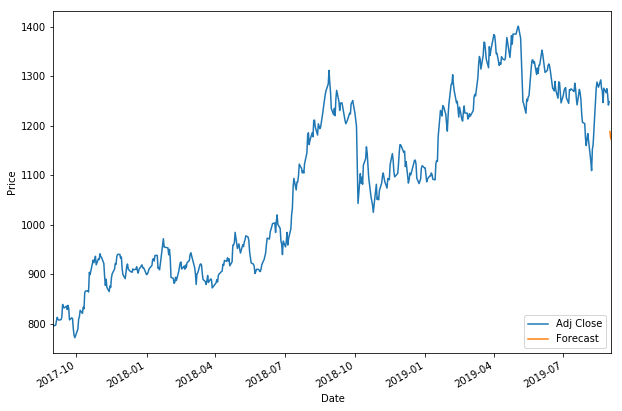

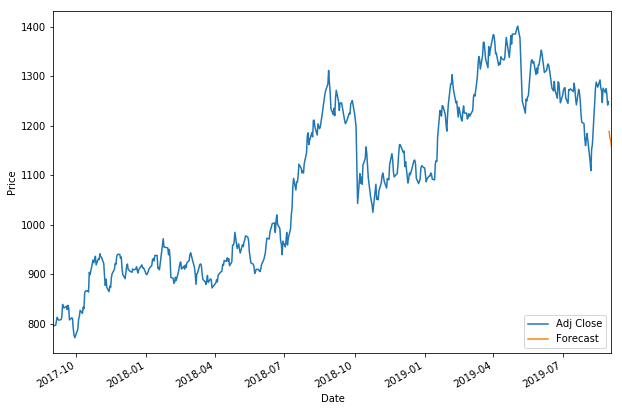

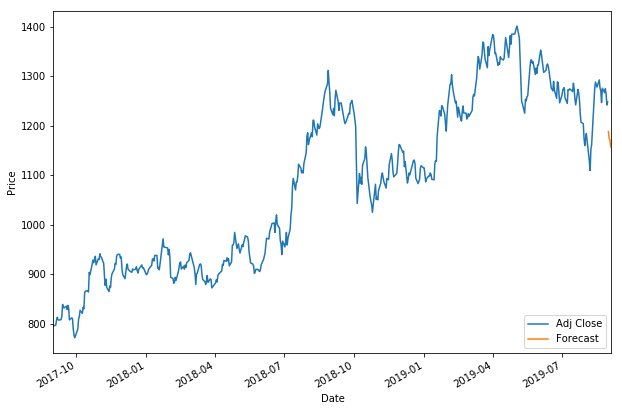

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import matplotlib as mpl

forecast_set_reg = clfreg.predict(X_lately)
forecast_set_reg
data['Forecast'] = np.nan

#Plotting the forecast with existing historical data so we can compare it to future price movements
last_date = data.iloc[-1].name
last_unix = last_date
next_unix = last_unix + dt.timedelta(days=1)

for i in forecast_set_reg: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += dt.timedelta(days=1)
    data.loc[next_date] = [np.nan for _ in range(len(data.columns)-1)]+[i]
    
    mpl.rc('figure', figsize=(10, 7))
    data['Adj Close'].tail(500).plot()
    data['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [0]:
def get_plot(maplot):
    last_date = data.iloc[-1].name
    last_unix = last_date
    next_unix = last_unix + dt.timedelta(days=1)


    for i in forecast_set_reg: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
        next_date = next_unix
        next_unix += dt.timedelta(days=1)
        data.loc[next_date] = [np.nan for _ in range(len(data.columns)-1)]+[i]
    
        mpl.rc('figure', figsize=(10, 7))
        data['Adj Close'].tail(500).plot()
        data['Forecast'].tail(500).plot()
        plt.legend(loc=4)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()

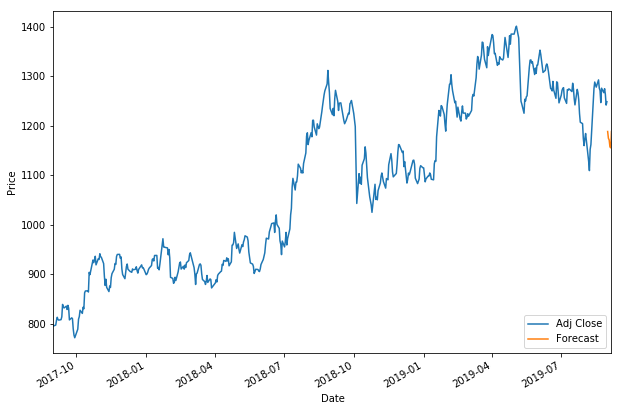

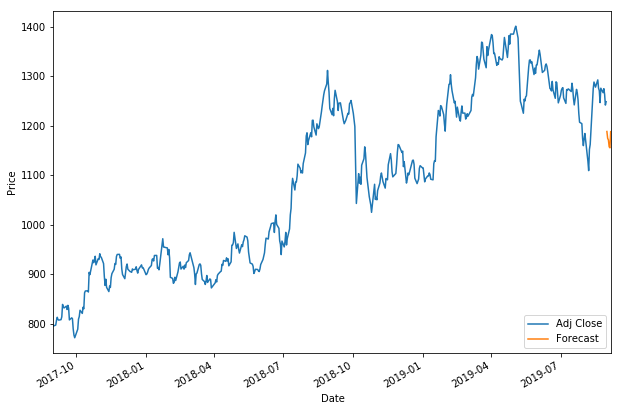

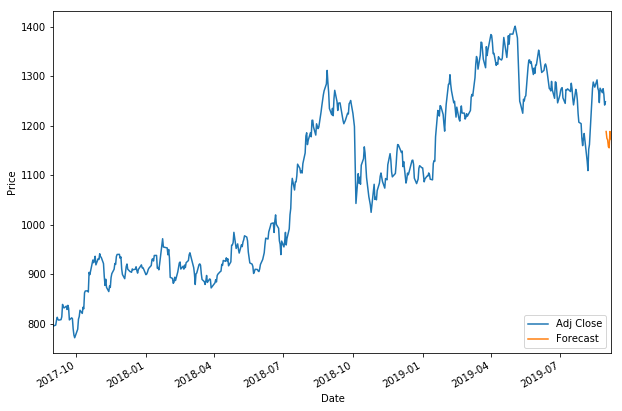

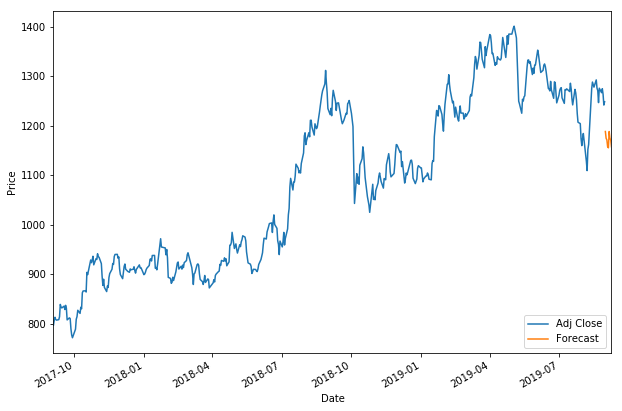

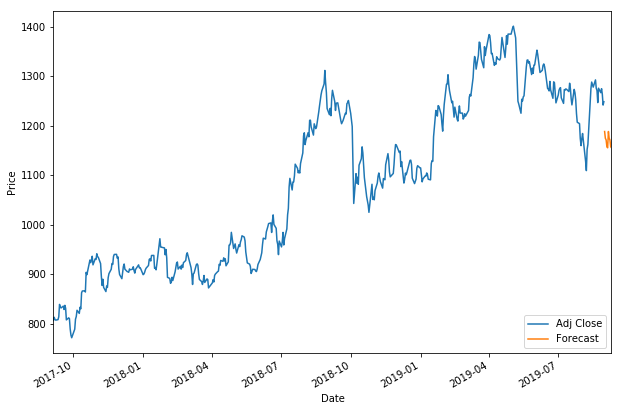

In [10]:
# Quad regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)
forecast_set_poly2 = clfpoly2.predict(X_lately)

get_plot(clfpoly2)

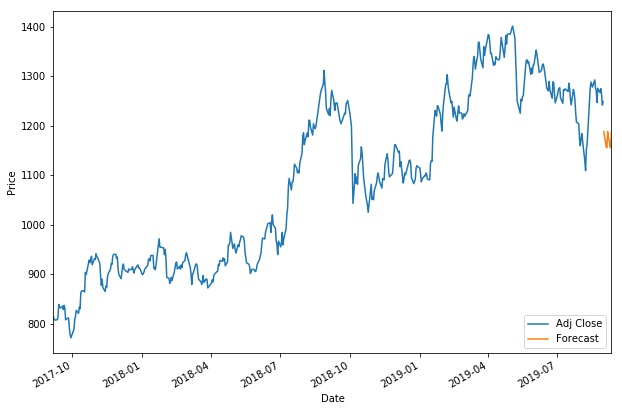

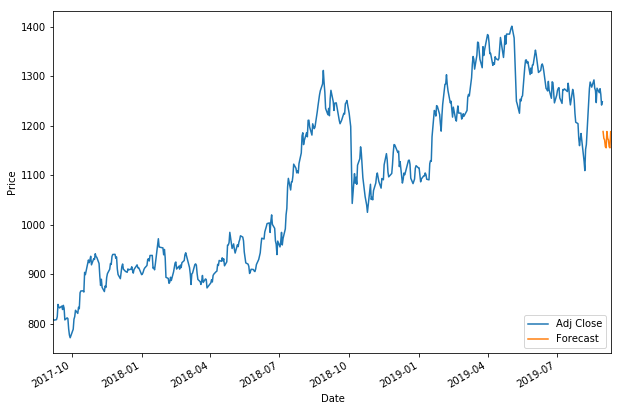

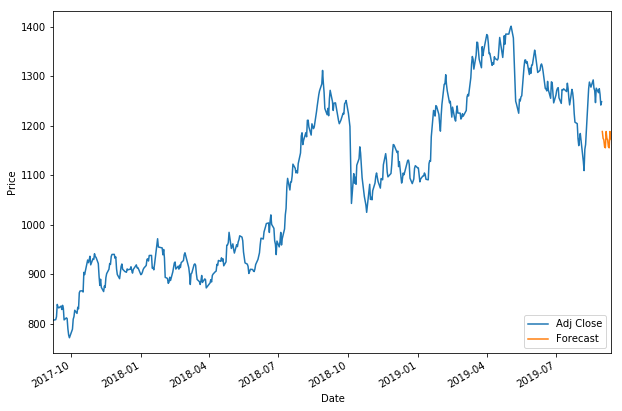

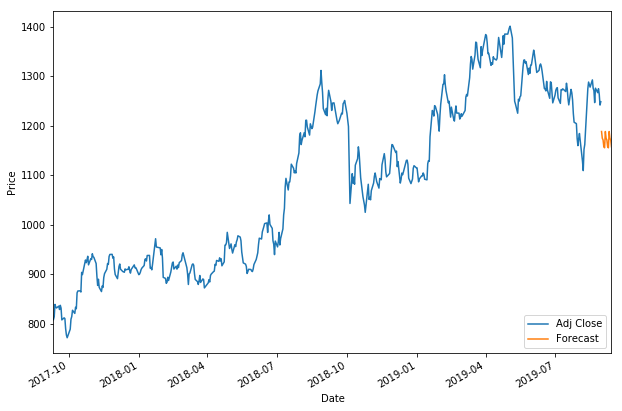

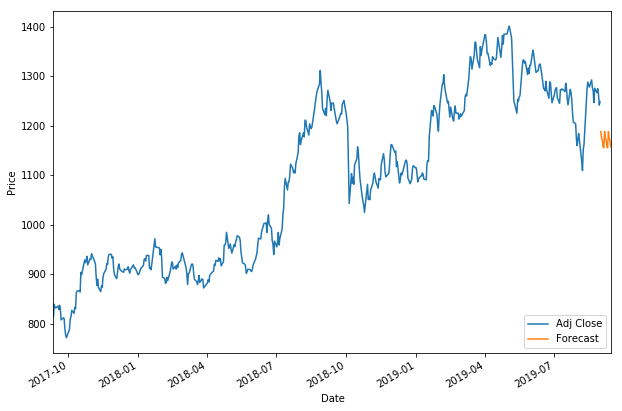

In [11]:
# Quad Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly3.fit(X_train, y_train)
forecast_set_poly3 = clfpoly3.predict(X_lately)
get_plot(forecast_set_poly3)



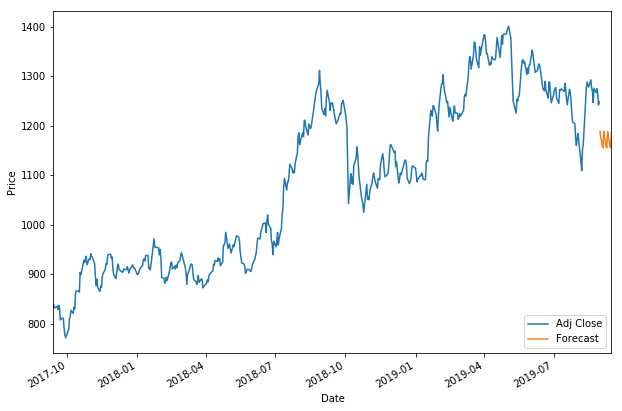

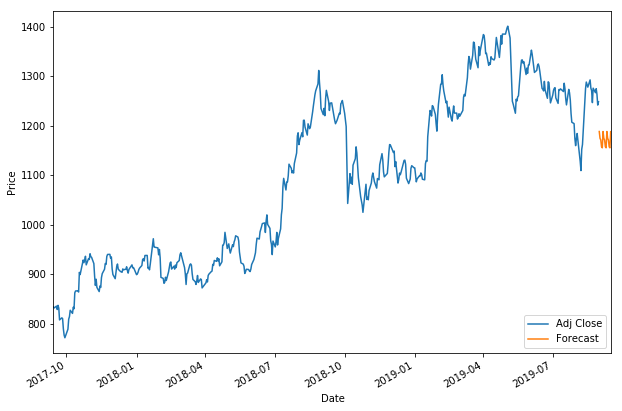

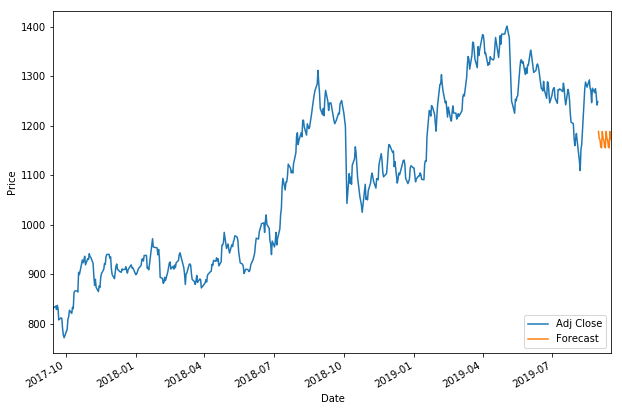

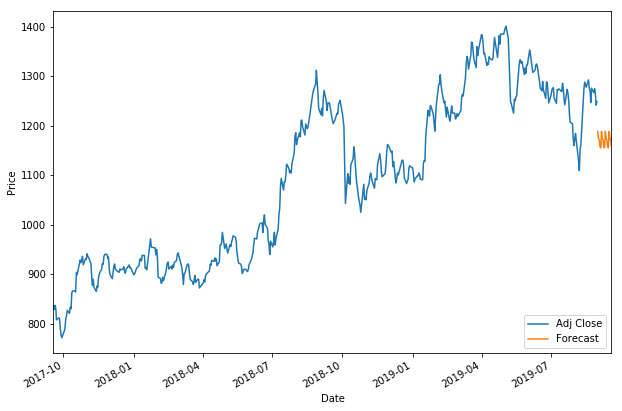

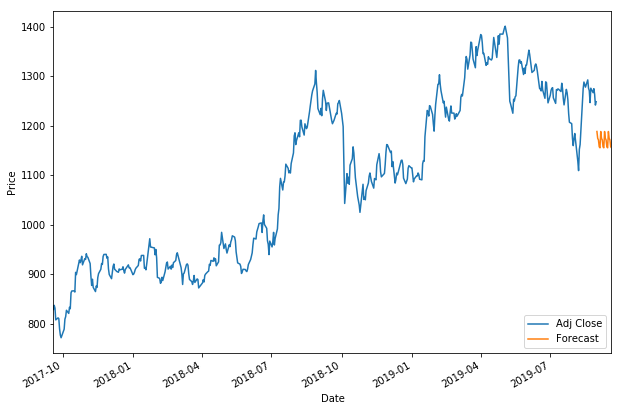

In [12]:
clfknn = KNeighborsRegressor(n_neighbors=4) # use 4 
clfknn.fit(X_train, y_train)
forecast_set_knn = clfknn.predict(X_lately)

get_plot(forecast_set_knn)